![imagen](../../imagenes/numpy.png)

# Numpy y matrices

#### Autor: [Daniel Ortiz López](https://www.linkedin.com/in/daniel-ortiz-l%C3%B3pez/)

En este Notebook descubrirás la que es probablemente **la librería más utilizada en Python**, `numpy`, la cual nos va a permitir trabajar con una gran variedad de datos en memoria como colecciones de documentos, imágenes, audios o medidas numéricas.

1. [Listas y matrices](#1.-Listas-y-matrices)
2. [Numpy](#2.-Numpy)
3. [Creacion de arrays](#3.-Creacion-de-arrays)
4. [Atributos del array](#4.-Atributos-del-array)
5. [Indexado](#5.-Indexado)
6. [Slicing y subarrays](#6.-Slicing-y-subarrays)
7. [Reshape](#7.-Reshape)
8. [Tipos de los datos](#8.-Tipos-de-los-datos)
9. [Concatenado](#9.-Concatenado)
10. [Sustitucion](#10.-Sustitucion)

## 1. Listas y matrices
Ya conocemos muy bien cómo funcionan las listas, aunque en este apartado profundizaremos un poco más en sus funcionalidades, acceso y dimensiones. **Las listas en Python son muy versátiles, lo que nos dan una gran flexibilidad a la hora de modelizar nuestros datos**. Además este apartado no servirá para refrescar conceptos con vistas a **comparar listas de Python con los arrays de Numpy**.

Declaramos una lista sencilla

In [6]:
my_list = [1,2,3,4,5,6,7,8,9]
my_list

[1, 2, 3, 4, 5, 6, 7, 8, 9]

Recordamos cómo accediamos a los elementos

In [23]:
# Primer elemento
print(my_list[0])

# Segundo elemento
print(my_list[1])

# Último elemento
print(my_list[-1])

# Elementos del 2do al 4to, ambos incluidos.
print(my_list[1:4])

# Elementos del 2do hasta el final
print(my_list[1:])

# Elementos del primero al 5to
print(my_list[:5])

1
2
9
[2, 3, 4]
[2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5]


¿Y si necesitamos una lista con múltiples dimensiones? ¡También podemos!

In [5]:
my_matrix = [[1,2,3],
             [4,5,6],
             [7,8,9]]
my_matrix

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

De esta forma estamos declarando una matriz de 3 filas x 3 columnas. ¿Cómo accedemos a sus elementos?

In [16]:
# Primer elemento
print(my_matrix[0])

# Es una lista
print(len(my_matrix[0]))

# Ultimo elemento
print(my_matrix[-1])

# Tercer elemento de la primera fila. Accedemos al dato (int)
print(my_matrix[0][2])
print(type(my_matrix[0][2]))

# Si queremos añadir más elementos a la matriz, con append
my_matrix.append([10,11,12])
print(my_matrix)

# Y si lo que queremos es añadir más elementos a alguna de las listas, extend nos puede resultar util.
my_matrix[0].extend([1.5, 2.5, 3.5])
print(my_matrix)

# append añade las listas como un elemento más, y extend los concatena a una lista que ya exista.

[1, 2, 3]
3
[10, 11, 12]
3
<class 'int'>
[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [10, 11, 12]]
[[1, 2, 3, 1.5, 2.5, 3.5], [4, 5, 6], [7, 8, 9], [10, 11, 12], [10, 11, 12]]


En los ejemplos de arriba hemos accedido a los elementos de la matriz directamente con sus índices, pero si no sabemos cómo de grande es la matriz, habrá que iterarla mediante bucles.

In [14]:
my_matrix = [[1,2,3],
             [4,5,6],
             [7,8,9]]

for i in range(len(my_matrix)):
    
    for j in range(len(my_matrix[i])):
        
        print(my_matrix[i][j], end=' ')
    
    print()

1 2 3 
4 5 6 
7 8 9 


Bien, hasta aquí todo correcto, **¿pero y si queremos multiplicar nuestra matriz por un escalar?** Es decir, simplemente aplicarle una operación a cada elemento de la matriz. Veamos cómo se hace.

In [35]:
my_matrix = [[1,2,3],
             [4,5,6],
             [7,8,9]]

# Matriz de dos dimensiones por lo que harán falta dos bucles
for fila in range(len(my_matrix)):
    
    for columna in range(len(my_matrix[fila])):
        
        my_matrix[fila][columna] = my_matrix[fila][columna] * 10

my_matrix

[[10, 20, 30], [40, 50, 60], [70, 80, 90]]

¡Conseguido! Aunque un poco aparatoso para ser una operación tan sencilla como multiplicar una matriz por 10. ¿Y si queremos hacer una matriz traspuesta? ¿Y si tenemos dos matrices de las mismas dimensiones y queremos multiplicar elemento a elemento? Se complica todavía más la cosa y tendremos que acudir a los bucles para solucionarlo cuando realmente hay una librería que lo hace por nosotros :)

Recuerda que gran parte de la potencia de Python reside en sus librerías, ya que ahorra muchísimo tiempo el no tener que implementar ciertas funciones en nuestro código ya que esas y muchas más vienen ya desarrolladas en paquetes más que probados como `numpy`.

## 2. Numpy
Esta librería va un paso más allá que las listas y permite realizar operaciones entre arrays, listas o matrices de una manera óptima. Características de `numpy`:

* **Librería**: Es una librería de Python por lo que tendrás que importarla mediante `import numpy as np`. Por costumbre se suele poner el alias `np`.

* **Listas y matrices**: Si nunca has trabajado con estos formatos de datos, no te puedes imaginar la cantidad de cosas que puedes hacer. Formatos de datos como por ejemplo las imágenes no dejan de ser matrices de números, que interpretados de la manera adecuada, representan píxeles con sus posiciones y sus colores.

* **Rendimiento**: no es un tema *core* en Data Science ya que para realizar tus análisis explotatorios o ejecutar tus modelos, lo vas a poder hacer igual sin preocuparte de este factor. Ahora bien, la cosa se complica cuando productivizamos productos de datos y el SLA (Service Learning Agreement) es exigente. Aquí entra en juego `numpy` ya que es una librería muy rápida.


**¿Qué podemos tratar con `numpy`?**
* **Imágenes**: las imágenes se pueden tratar como arrays de pixels, los cuales tienen unos valores dependiendo del color.
* **Audio**: también se pueden manejar mediante arrays unidimensionales.
* **Texto**: lo podemos representar también en un formato numérico.

Podrás encontrar toda la [documentación de `numpy` en su página oficial](https://numpy.org/doc/).

In [2]:
# Por costumbre se pone el alias np
import numpy as np
np.__version__

'1.18.1'

In [44]:
# Es tan extensa la librería que ni nos deja imprimir por pantalla la documentación completa.
help(np)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [45]:
np?

Type:        module
String form: <module 'numpy' from 'C:\\Users\\Daney\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>
File:        c:\users\daney\anaconda3\lib\site-packages\numpy\__init__.py
Docstring:  
NumPy
=====

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

How to use the documentation
----------------------------
Documentation is available in two forms: docstrings provided
with the code, and a loose standing reference guide, available from
`the NumPy homepage <https://www.scipy.org>`_.

We recommend exploring the docstrings using
`IPython <https://ipython.org>`_, an advanced Python shell with
TAB-completion and introspection capabilities.  See below for further
instructions.

The docstring examples assume that `numpy` has been imported as `np`::

  >>> import numpy as np

Code snippets are indicated by three greater-than signs::

  >>> x = 42
  >

In [ ]:
help(np.random)

Se verá más en detalle en posteriores apartados, pero algunos ejemplos de cosas que podemos hacer con `numpy` son:

In [65]:
# Si queremos multiplicar todos los elementos de una matriz por 10
array = np.array([1,2,3,4,5])

print(array * 10)

[10 20 30 40 50]
<class 'numpy.ndarray'>


<class 'numpy.ndarray'>
(434, 1000, 3)


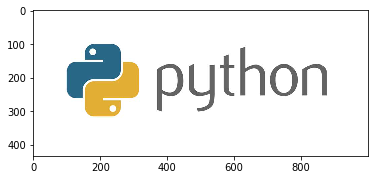

In [72]:
# Imagenes
from skimage.io import imread
import matplotlib.pyplot as plt

image = imread("../../imagenes/python.jpg")
print(type(image))
plt.imshow(image)
print(image.shape)

## 3. Creacion de arrays
Lo primero, importamos la librería de `numpy`

In [1]:
import numpy as np

**Vectores**

Ya podemos crear nuestro primer vector. Que se trata de un array de 1D

In [70]:
array = np.array([1,2,3,4,5])
print(array)

[1 2 3 4 5]


El acceso a sus elementos es igual que en las listas

In [53]:
print(array[0])
print(array[-1])
print(array[-2])

1
5
4


**Fíjate en el tipo**. Ya no son listas, aunque lo parecen. Incluso los tipos de los datos ya no son los que conocemos, sino que `numpy` aporta nuevos tipos de datos. Lo veremos más adelante.

In [71]:
print(type(array))
print(type(array[0]))
print(array.dtype)

<class 'numpy.ndarray'>
<class 'numpy.int32'>
int32


**Matrices**

Vamos a crear ahora un **array multidimensional**

In [55]:
array_multi = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(array_multi)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Otra ventaja de usar `numpy` en vez de listas es que el `print` lo realiza en formato matriz, lo que nos permite ver los datos mucho mejor que si lo imprimiese en una sola línea.

**Secuencias**

¿Recuerdas `range()`? Lo usábamos en listas para crear secuencias, estableciendo el punto de inicio, de parada, y el salto entre elementos. En `numpy` hay algo parecido denominado `arange`. [Te dejo el enlace a la documentación](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).

In [10]:
# Array del 0 al 9
print(np.arange(10))

# Del 0 al 9 con saltos de 2
print(np.arange(0, 10, 2))

# Array del 0 al 10 con saltos de 0.5 en 0.5
print(np.arange(0, 10, 0.5))

# Tiene otro argumento en el que especificamos el tipo de dato
print(np.arange(0, 10, 2, np.float64))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[0. 2. 4. 6. 8.]


**Random**

Otra opción es usar el paquete `random` de `numpy`. **Muy útil cuando tenemos que crear secuencias aleatorias**, y lo mejor de todo es que tiene una gran cantidad de opciones para configurar. [Consulta la documentación para más detalle](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html).

In [61]:
# Valores aleatorios para una distribución uniforme.
print(np.random.rand(10))
print(np.random.randint(3, size = (3,4))) # 3 es el valor más alto
print(np.random.randint(1, 10, size = (10)))
print(np.random.randint(1, 10, size = (3,4)))

[0.8786598  0.55477039 0.78924793 0.11764815 0.736338   0.41717195
 0.89545929 0.64583422 0.05248066 0.80741887]
[[0 1 0 0]
 [1 0 2 0]
 [1 1 1 1]]
[7 9 1 5 2 9 4 7 7 5]
[[7 4 1 8]
 [5 5 8 1]
 [4 5 9 7]]


**Seed**

Como habrás podido comprobar, cada ejecución de una secuencia aleatoria es diferente. **Fijando una semilla, todas las secuencias aleatorias que ejecutes (si tienen los mismos argumentos), tendrán siempre el mismo output**. Se usa mucho cuando queremos replicar resultados, o compartirlos con otros compañeros. Los resultados que obtengas en este Notebook no serán los mismos que obtenga el compañero, en caso de haber un factor aleatorio, por lo que no vamos a poder comparar los Notebooks... A no ser que ambos fijéis la misma semilla.

**¿Qué valor ponemos en seed? El que queramos** mientras en el resto de Notebooks donde queramos replicar estos resultados, tengan la misma semilla.

In [33]:
np.random.seed(1234)
print(np.random.rand(10))

np.random.seed(5678)
print(np.random.rand(10))

np.random.seed(None)
print(np.random.rand(10))

[0.19151945 0.62210877 0.43772774 0.78535858 0.77997581 0.27259261
 0.27646426 0.80187218 0.95813935 0.87593263]
[0.48932698 0.05933244 0.36620243 0.51886544 0.59822501 0.43061449
 0.17863405 0.2852539  0.07143863 0.18471334]
[0.29475592 0.91148515 0.27874396 0.1264012  0.788682   0.70910396
 0.27191794 0.57598594 0.50525218 0.30603923]


**Matrices con valores**
[Hay diferentes maneras de crear arrays o matrices](https://numpy.org/doc/stable/reference/routines.array-creation.html), pero en ocasiones necesitamos tener predefinidas matrices con un único valor. Veamos algunos ejemplos.

In [74]:
# La matriz identidad, con toda su diagonal a 0s y el resto a 1s
print(np.identity(3))

# Matriz de 0s
print('')
print(np.zeros((3,3)))

# Matriz de 1s
print('')
print(np.ones((3,3)))

# Matriz de 100es
print('')
print(np.full((3,3),100))


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

[[100 100 100]
 [100 100 100]
 [100 100 100]]


<table align="left">
 <tr><td width="80"><img src="../../imagenes/ejercicio.png" style="width:auto;height:auto"></td>
     <td style="text-align:left">
         <h3>Ejercicio creación de arrays en numpy</h3>

      
<ol>
    <li>Crea un array con 3 deportes que te gusten</li>
    <li>Accede al primer elemento y al último</li>
    <li>Comprueba los tipos de los datos</li>
    <li>Crea una secuencia de numeros del 10 al 0, con saltos de -0.5</li>
    <li>Crea una matriz de 5x2 con numeros enteros aleatorios comprendidos entre el 10 y el 20</li>
</ol>
         
 </td></tr>
</table>

In [81]:
# 1.
sports = np.array(["Futbol", "Basket", "Tenis"])
print(sports)

# 2. 
print(sports[0])
print(sports[-1])

# 3.
print(sports.dtype)

# 4.
print(np.arange(10, -0.5, -0.5))

# 5.
print(np.random.randint(10, 20, size = (5,2)))

['Futbol' 'Basket' 'Tenis']
Futbol
Tenis
<U6
[10.   9.5  9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5
  3.   2.5  2.   1.5  1.   0.5  0. ]
[[11 18]
 [11 17]
 [14 12]
 [12 13]
 [12 18]]


## 4. Atributos del array

Hay ciertos atributos que debemos conocer:
* `ndim`: es el numero de dimensiones. Número de niveles que tiene el array de `numpy`.
* `shape`: tamaño de cada una de las dimensiones. Devuelve el resultado en formato `tupla`
* `size`: cantidad de elementos del array.

In [57]:
print(array_multi.ndim)
print(array_multi.shape)
print(array_multi.size)

2
(3, 3)
9


In [65]:
array_multi_3 = np.array([[[1,10],[2,20],[3,30]],
                          [[4,40],[5,50],[6,60]],
                           [[7,70],[8,80],[9,90]]])
print(array_multi_3)
print(array_multi_3.ndim)
print(array_multi_3.shape)
print(array_multi_3.size)

[[[ 1 10]
  [ 2 20]
  [ 3 30]]

 [[ 4 40]
  [ 5 50]
  [ 6 60]]

 [[ 7 70]
  [ 8 80]
  [ 9 90]]]
3
(3, 3, 2)
18


Otros atributos interesantes son:
* `itemsize`: tamaño en bytes de los items del array
* `nbytes`: tamaño en bytes de todo el array

In [70]:
array = np.array([1,2,3,4,5])
print(array.itemsize)
print(array.nbytes)

4
20


In [74]:
array = np.array([1,2,3,4,5], dtype=np.float64)
print(array.itemsize)
print(array.nbytes)

8
40


Vemos que aumentando el tamaño de los elementos, el array es el doble de pesado. Profundizaremos más adelante en los tipos.

## 5. Indexado
¿Cómo accedemos a los elementos del array?

Declaremos primero varios arrays

In [82]:
array_1 = np.array([1,2,3,4,5])
array_2 = np.array([[1,2,3], [4,5,6], [7,8,9]])
array_3 = np.array([[[1,10],[2,20],[3,30]],
                    [[4,40],[5,50],[6,60]],
                    [[7,70],[8,80],[9,90]]])

print(array_1.ndim)
print(array_2.ndim)
print(array_3.ndim)

1
2
3


Probamos primero con el primer array

In [78]:
print(array_1[0])
print(array_1[1])
print(array_1[-1])
print(array_1[2:5])

1
2
5
[3 4 5]


Vamos ahora con el de dos dimensiones

In [85]:
print(array_2[0])
print(array_2[-1])
print(array_2[0,1]) # Para acceder al elemento de su segunda dimension


print(type(array_2[0])) # Lo que hay dentro es un array de numpy
print(array_2[0][1])
print(type(array_2[0][1])) # Lo que vemos 

[1 2 3]
[7 8 9]
2
<class 'numpy.ndarray'>
2
<class 'numpy.int32'>


Y ahora con el de 3

In [88]:
print(array_3[0])
print(array_3[0][-1][-1])
print(array_3[0, -1, -1])

[[ 1 10]
 [ 2 20]
 [ 3 30]]
30
30


## 6. Slicing y subarrays
Ya hemos visto que podemos acceder a los elementos individuales del array usamos la sintaxis con corchetes, pero si necesitamos acceder a un conjunto de valores, tendremos que usar `:`. El slicing sigue la siguiente sintaxis:
```Python
x[start:stop:step]
```
Por defecto, si no ponemos alguno de estos argumentos, `start = 0`, `stop = tamaño de la dimensión` y `step = 1`.

Recuerda, al igual que en listas, el `start` está incluido, mientras que el stop no.

Veamos primero un ejemplo para una dimensión

In [37]:
# Declaramos array
x = np.arange(10)
print(x)

print("Del primero al quinto", x[0:5])

print("Del primero al quinto con saltos de dos", x[0:5:2])

print("Desde el quinto", x[5:])

print("Del quinto al primero", x[5::-1])

print("Copia del array", x[:])

print("Ultimos dos elementos", x[-2:])

[0 1 2 3 4 5 6 7 8 9]
Del primero al quinto [0 1 2 3 4]
Del primero al quinto con saltos de dos [0 2 4]
Desde el quinto [5 6 7 8 9]
Del quinto al primero [5 4 3 2 1 0]
Copia del array [0 1 2 3 4 5 6 7 8 9]
Ultimos dos elementos [8 9]


<table align="left">
 <tr><td width="80"><img src="../../imagenes/ejercicio.png" style="width:auto;height:auto"></td>
     <td style="text-align:left">
         <h3>Ejercicio slicing</h3>

      
<ol>
    <li>Todos los elementos, pero de dos en dos</li>
    <li>Todos los elementos, pero de dos en dos, a partir del segundo item</li>
    <li>Todo, pero invertido</li>
    <li>Obtén los últimos dos items, pero invertidos</li>
    <li>Todo, excepto los ultimos dos items, invertido.</li>
</ol>
         
 </td></tr>
</table>

In [5]:
import numpy as np
x = np.arange(10)
print(x)

print("Todos los elementos, pero de dos en dos, a partir del segundo item", x[1::2])

print("Todos los elementos, pero de dos en dos", x[::2])

print("Todo, pero invertido", x[::-1])

print("Ultimos dos items invertidos", x[:-3:-1])

print("Todo, excepto los ultimos dos items, invertido.", x[-3::-1])

[0 1 2 3 4 5 6 7 8 9]
Todos los elementos, pero de dos en dos, a partir del segundo item [1 3 5 7 9]
Todos los elementos, pero de dos en dos [0 2 4 6 8]
Todo, pero invertido [9 8 7 6 5 4 3 2 1 0]
Ultimos dos items invertidos [9 8]
Ultimos dos items invertidos [8 7 6 5 4]
Todo, excepto los ultimos dos items, invertido. [7 6 5 4 3 2 1 0]


Veamos ahora unos ejemplos multidimensionales. Funciona igual, lo unico que ahora cada dimension irá separado por comas

In [59]:
array_multi = np.array([[1,2,3,4,5], [6,7,8,9,10], [11,12,13,14,15]])
print(array_multi)

print("2 primeras filas, 3 primeras columnas\n", array_multi[:2, :3])

print("Todas las filas, cada dos columnas\n", array_multi[::, ::2])

print("Invertir filas\n", array_multi[::-1])

print("Invertir columnas\n", array_multi[::-1,::-1])

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
2 primeras filas, 3 columnas
 [[1 2 3]
 [6 7 8]]
Todas las filas, cada dos columnas
 [[ 1  3  5]
 [ 6  8 10]
 [11 13 15]]
Invertir filas
 [[11 12 13 14 15]
 [ 6  7  8  9 10]
 [ 1  2  3  4  5]]
Invertir columnas
 [[15 14 13 12 11]
 [10  9  8  7  6]
 [ 5  4  3  2  1]]


Otra forma de quedarnos con subarrays, o de filtrarlos, es mediante una máscara de booleanos. La máscara tiene las mismas dimensiones que el array, y donde haya un `True`, se quedará con ese valor, pero donde haya un `False`, lo ignorará.

In [5]:
x = np.array([2,4,5,2,3,7,2])
print(x)
print(x == 2)

[2 4 5 2 3 7 2]
[ True False False  True False False  True]


In [6]:
x_bools = np.array(x == 2)
print(x_bools)
print(x[x_bools])

[ True False False  True False False  True]
[2 2 2]


In [10]:
b = np.array([[True, True, False], [False, True, True]])
print(x[b])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [20 21 22 23 24]
 [25 26 27 28 29]]


## 7. Reshape
Con el reshape podremos **cambiar las dimensiones de los arrays**, siempre y cuando en numero de elementos sea posible. Por ejemplo, si tenemos 4 elementos, no podremos hacer una matriz de 3x3.

Éste método se puede utilizar en una infinidad de casos, pero lo más habitual sería, partiendo de un array de una dimensión, convirtiéndolo en multidimensión.

In [18]:
x = np.arange(9)
print(x)

y = x.reshape((3,3))
print(y)

[0 1 2 3 4 5 6 7 8]
[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [6]:
x = np.arange(30).reshape((2,3,5))
print(x)

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]]


In [21]:
x = np.array([1, 2, 3])

print(x.reshape((1, 3)))

print(x.reshape((3, 1)))

[[1 2 3]]
[[1]
 [2]
 [3]]


<table align="left">
 <tr><td width="80"><img src="../../imagenes/error.png" style="width:auto;height:auto"></td>
     <td style="text-align:left">
         <h3>ERRORES con reshape</h3>
         
 </td></tr>
</table>

In [22]:
x.reshape((3,4))

ValueError: cannot reshape array of size 3 into shape (3,4)

## 8. Tipos de los datos
En `numpy` también hay **que tener en cuenta los tipos de datos con los que trabajamos**, para no cometer el error de *mezclar peras con manzanas*. Es más, **`numpy` es mucho más variado en cuanto a tipos**, que el propio intérprete de Python. 

En el caso de `numpy`, hay que pensar en el factor tamaño cuando especifiquemos los tipos de los datos. No es lo mismo el numero 12, que el 120000000000. Desde el punto de vista del intérprete de Python, son dos `int`s, pero para numpy son un `int32` o un `int64`. Ese número es la cantidad de bits que se necesita para representar el valor. Cuanto más grande sea el valor, mayor cantidad de bits utilizaremos.

[En la documentación tienes el detalle de todos los tipos de datos.](https://numpy.org/devdocs/user/basics.types.html)

Por ejemplo, valores numéricos

In [16]:
# Valores enteros normales
x = np.array([1,2,3,4])
print(x)
print(x.dtype)

# Valores enteros grandes
x = np.array([10000000000000000])
print(x)
print(x.dtype)

[1 2 3 4]
int32
[10000000000000000]
int64


In [17]:
# Floats
x = np.array([1.])
print(x)
print(x.dtype)

[1.]
float64


Si tenemos booleanos

In [18]:
x = np.array([True, False, True])
print(x.dtype)

bool


Cadenas de texto. La `U` viene de unicode, que es la codificación que sigue `numpy`. Y el número de al lado es la longitud de la cadena de texto más larga del array.

In [19]:
x = np.array(['a', 'b', 'c'])
print(x.dtype)

<U1


Podemos mezclar varios tipos de datos, pero `numpy` forzará un solo tipo. ¿Cómo lo hace? Realiza las conversiones de tal manera que no pierda información en la conversión. En la conversión prima el siguiente orden: String -> Float -> Int -> Boolean

In [22]:
print(np.array(['a', True]))
print(np.array([1,True]))
print(np.array([1,1.]))

['a' 'True']
[1 1]
[1. 1.]


## 9. Concatenado
Para concatenar matrices, `numpy` tiene varios métodos: `np.concatenate`, `np.vstack` o `np.hstack`. Lo único que hay que tener en cuenta es que coincidan las dimensiones, para que el concatenado sea correcto.

In [25]:
x = np.array([1,2,3])
y = np.array([3,2,1])
np.concatenate([x,y])

array([1, 2, 3, 1, 2, 3])

Como ves, el concatenado es horizontal. Al ser elementos de 1D, mantiene las dimensiones. Se pueden concatenar todos los arrays que queramos.

In [28]:
z = np.array([99,99,99])
np.concatenate([x,y,z])

array([ 1,  2,  3,  1,  2,  3, 99, 99, 99])

Probemos ahora con arrays bidimensionales

In [29]:
xy = np.array([[1,2,3],
              [4,5,6]])

np.concatenate([xy, xy])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

Ahora podemos jugar con los ejes. El método `concatenate` tiene un argumento que es `axis`, con el cual podemos jugar con las dimensiones y elegir el tipo de concatenado.

In [30]:
np.concatenate([xy, xy], axis = 1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

Si tenemos arrays de diferentes dimensiones, puede resultar más útil usar `vstack`

In [32]:
x = np.array([1,2,3])
xy = np.array([[1,2,3],
              [4,5,6]])

np.vstack([x, xy])

array([[1, 2, 3],
       [1, 2, 3],
       [4, 5, 6]])

O si queremos hacer un concatenado horizontal, lo haremos mediante `hstack`.

In [35]:
x = np.array([[1],[2]])
xy = np.array([[1,2,3],
              [4,5,6]])

np.hstack([xy, x])

array([[1, 2, 3, 1],
       [4, 5, 6, 2]])

## 10. Sustitucion
En `numpy` podemos aplicar operaciones para sustituir elementos dependiendo de ciertas condiciones, y con esa sintaxis de sustitución también es posible filtrar datos de las matrices.

In [40]:
xy = np.array([[1,2,3],
              [4,5,6]])

my_filter = ([True, False])

xy[my_filter]

array([[1, 2, 3]])

De esta manera, lo que hacemos es preparar una lista de booleanos, y se lo aplicamos al array. Si lo queremos hacer de una manera más automática y entendible, utilizamos `where`.

In [52]:
print(np.where(xy < 4, 5, 100))
print(np.where(xy < 4, 5, xy))
print(np.where(xy < 4)[0])
print(np.where(xy < 4)[1])

xy[np.where(xy < 4)]

[[  5   5   5]
 [100 100 100]]
[[5 5 5]
 [4 5 6]]
[0 0 0]
[0 1 2]


array([1, 2, 3])

O incluso podemos sustituit los que se den en la condición, y el resto mantener los valores del array.